<a href="https://colab.research.google.com/github/oscardienal/PortfolioProjectCovid/blob/main/Oscar_Data_Analysis_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
data = pd.DataFrame(
           {
               "Negara": ["Indosenia", "Malaysia", "Singapura", "Malaysia", "Thailand", None],
               "A": [1, 2, None, 2, 3, None],
               "B": [5, None, 7, None, None, None],
               "C": [99, 9, None, 9, 11, None],
               "D": [12, 8, 14, 8, 15, None],
           }
       )
# Print the dataset
print("Original dataset:")
print(data)

Original dataset:
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


In [ ]:
data.describe()

,A,B,C,D
count,4.000000,2.000000,4.000000,5.000000
mean,2.000000,6.000000,32.000000,11.400000
std,0.816497,1.414214,44.676616,3.286335
min,1.000000,5.000000,9.000000,8.000000
25%,1.750000,5.500000,9.000000,8.000000
50%,2.000000,6.000000,10.000000,12.000000
75%,2.250000,6.500000,33.000000,14.000000
max,3.000000,7.000000,99.000000,15.000000


In [ ]:
# Check for missing values in the entire dataset
print("\nMissing values in the entire dataset:")
print(data.isnull().sum())

# Identify column with missing values
print("\ncColumns with missing values:")
print(data.columns[data.isnull().any()].tolist())


Missing values in the entire dataset:
Negara    1
A         2
B         4
C         2
D         1
dtype: int64

cColumns with missing values:
['Negara', 'A', 'B', 'C', 'D']


In [ ]:
drop_row = data.dropna(how='all')
drop_row

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0


In [ ]:
drop_row = data.dropna(how='any')
drop_row

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0


In [ ]:
drop_col = data.dropna(thresh=4, axis='columns')
drop_col

,Negara,A,C,D
0,Indosenia,1.0,99.0,12.0
1,Malaysia,2.0,9.0,8.0
2,Singapura,NaN,NaN,14.0
3,Malaysia,2.0,9.0,8.0
4,Thailand,3.0,11.0,15.0
5,None,NaN,NaN,NaN


In [ ]:
fill_na = data.fillna({'A': 0, 'B': 10, 'C': data['C'].mean()})
fill_na

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,10.0,9.0,8.0
2,Singapura,0.0,7.0,32.0,14.0
3,Malaysia,2.0,10.0,9.0,8.0
4,Thailand,3.0,10.0,11.0,15.0
5,None,0.0,10.0,32.0,NaN


In [ ]:
# Print the original column A
print("\nOriginal column A:")
print(data["A"])

# Impute missing values with the column A's mean
data_imputed = data["A"].fillna(data["A"].mean())

# Print the imputed column A
print("\nImputed column A")
print(data_imputed)


Original column A:
0    1.0
1    2.0
2    NaN
3    2.0
4    3.0
5    NaN
Name: A, dtype: float64

Imputed column A
0    1.0
1    2.0
2    2.0
3    2.0
4    3.0
5    2.0
Name: A, dtype: float64


In [ ]:
# Print the original column B
print("\nOriginal column B:")
print(data["B"])

# Forward-fil missing values in column B
data_imputed = data["B"].fillna(method="ffill")

# Print the forward-filled column B
print("\nForward-filled column B:")
print(data_imputed)

# Backward-fill missing values
data_imputed = data["B"].fillna(method='bfill')

# Print the backward-filled column B
print("\nBackward-filled column B:")
print(data_imputed)


Original column B:
0    5.0
1    NaN
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64

Forward-filled column B:
0    5.0
1    5.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: B, dtype: float64

Backward-filled column B:
0    5.0
1    7.0
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64


In [ ]:
# Print the dataset before interpolation
print("Before interpolation:")
print(data)

# Print the dataset after interpolation
print("\nAfter interpolation")
print(data.interpolate())

Before interpolation:
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN

After interpolation
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  6.0   9.0   8.0
2  Singapura  2.0  7.0   9.0  14.0
3   Malaysia  2.0  7.0   9.0   8.0
4   Thailand  3.0  7.0  11.0  15.0
5       None  3.0  7.0  11.0  15.0


Data Duplicate

In [ ]:
# Identify duplicate rows
duplicates = data.duplicated()

# Print the duplicate rows
data[duplicates]

,Negara,A,B,C,D
3,Malaysia,2.0,NaN,9.0,8.0


In [ ]:
# Drop duplicate rows
duplicated_data = data.drop_duplicates()

# Print the updated Dataframe
duplicated_data

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [ ]:
# Keep the first occurrence of the duplicate
duplicated_data = data.drop_duplicates(keep='last')

# Print the updated Dataframe
duplicated_data

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [ ]:
typo_data = data.copy()
typo_data['Negara'] = typo_data['Negara'].replace(['Indosenia'], 'Indonesia')
typo_data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [ ]:
typo_data['Negara'] = typo_data['Negara'].replace(['Indosenia', 'Thailand'], ['Indonesia', 'Brunei'])
typo_data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Brunei,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


Outlier Data

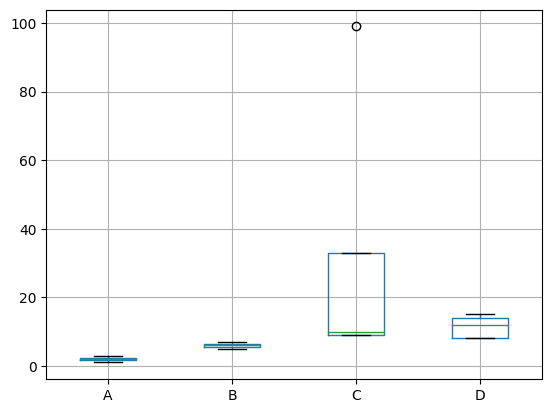

In [ ]:
boxplot = data.boxplot(column=['A', 'B', 'C', 'D'])

In [ ]:
drop_row = data.dropna(how='all')
drop_row

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0


In [ ]:
fill_na = drop_row.fillna({'A': 0, 'B': 10, 'C': 0, 'D': 0})
fill_na

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,10.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,10.0,9.0,8.0
4,Thailand,3.0,10.0,11.0,15.0


In [ ]:
Q1 = fill_na['C'].quantile(0.25)
Q3 = fill_na['C'].quantile(0.75)
IQR = Q3 - Q1

IQR

2.0

In [ ]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit

14.0

In [ ]:
fill_na[fill_na['C'] > upper_limit]
# fill_na{fill_na['C'] < lower_limit}

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0


In [ ]:
# 1: Trimming outliers
new_df = fill_na[fill_na['C'] < upper_limit]
new_df

,Negara,A,B,C,D
1,Malaysia,2.0,10.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,10.0,9.0,8.0
4,Thailand,3.0,10.0,11.0,15.0


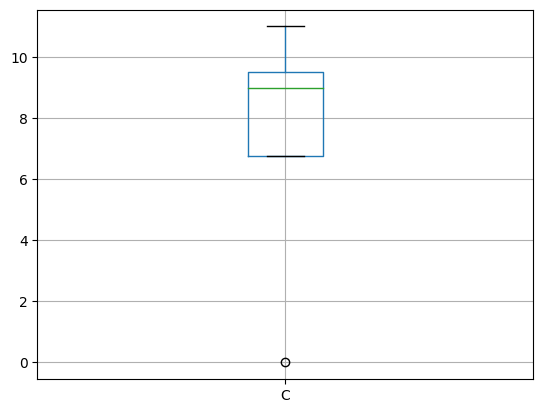

In [ ]:
boxplot = new_df.boxplot(column=['C'])

In [ ]:
new_df_cap = fill_na.copy()
new_df_cap['C'] = np.where(
    new_df_cap['C'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['C'] < lower_limit,\
        lower_limit,
        new_df_cap['C']
    )
)
new_df_cap

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,14.0,12.0
1,Malaysia,2.0,10.0,9.0,8.0
2,Singapura,0.0,7.0,6.0,14.0
3,Malaysia,2.0,10.0,9.0,8.0
4,Thailand,3.0,10.0,11.0,15.0
